In [ ]:
import torchvision, torch
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

batch_size = 60000
trainset = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12709329.31it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1788799.21it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13836653.30it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6221596.59it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
for x in trainloader:
  break

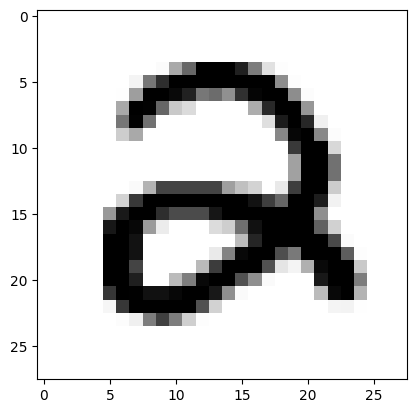

In [ ]:
import matplotlib.pyplot as plot
plot.imshow(x[0][0][0], cmap=plot.cm.binary)
plot.show()

In [ ]:
x[1][350]

tensor(4)

In [ ]:
y = {}
for i in range(28):
  for j in range(28):
    y[(i, j)] = 0

In [ ]:
import tqdm

In [ ]:
for image_index in tqdm.tqdm(range(batch_size)):
  for i in range(28):
    for j in range(28):
      if x[0][image_index][0][i][j] == -1:
        y[(i, j)] += 0
      else:
        y[(i, j)] += 1

 76%|███████▌  | 45691/60000 [13:35<04:15, 56.06it/s]


KeyboardInterrupt: 

In [ ]:
y

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (0, 4): 0,
 (0, 5): 0,
 (0, 6): 0,
 (0, 7): 0,
 (0, 8): 0,
 (0, 9): 0,
 (0, 10): 0,
 (0, 11): 0,
 (0, 12): 2,
 (0, 13): 2,
 (0, 14): 1,
 (0, 15): 1,
 (0, 16): 0,
 (0, 17): 0,
 (0, 18): 0,
 (0, 19): 0,
 (0, 20): 0,
 (0, 21): 0,
 (0, 22): 0,
 (0, 23): 0,
 (0, 24): 0,
 (0, 25): 0,
 (0, 26): 0,
 (0, 27): 0,
 (1, 0): 0,
 (1, 1): 0,
 (1, 2): 0,
 (1, 3): 0,
 (1, 4): 1,
 (1, 5): 2,
 (1, 6): 6,
 (1, 7): 14,
 (1, 8): 19,
 (1, 9): 35,
 (1, 10): 50,
 (1, 11): 66,
 (1, 12): 83,
 (1, 13): 83,
 (1, 14): 80,
 (1, 15): 82,
 (1, 16): 80,
 (1, 17): 68,
 (1, 18): 48,
 (1, 19): 30,
 (1, 20): 22,
 (1, 21): 13,
 (1, 22): 5,
 (1, 23): 2,
 (1, 24): 0,
 (1, 25): 0,
 (1, 26): 0,
 (1, 27): 0,
 (2, 0): 0,
 (2, 1): 0,
 (2, 2): 1,
 (2, 3): 2,
 (2, 4): 8,
 (2, 5): 12,
 (2, 6): 32,
 (2, 7): 72,
 (2, 8): 134,
 (2, 9): 235,
 (2, 10): 396,
 (2, 11): 599,
 (2, 12): 837,
 (2, 13): 1136,
 (2, 14): 1351,
 (2, 15): 1538,
 (2, 16): 1539,
 (2, 17): 1425,
 (2, 18): 1162,
 (2, 19):

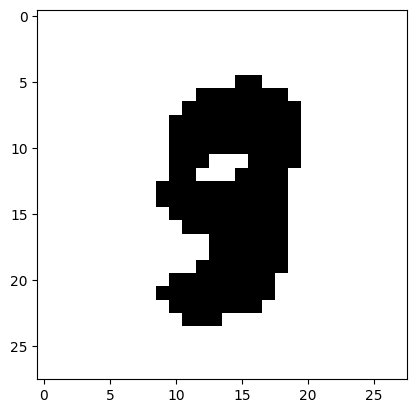

In [ ]:
output_image = []
for i in range(28):
    row = []
    for j in range(28):
        if y[(i, j)] > batch_size / 2:
            row.append(1)
        else:
            row.append(0)
    output_image.append(row)

output_image = torch.tensor(output_image, dtype=torch.float32)
plot.imshow(output_image, cmap=plot.cm.binary)
plot.show()

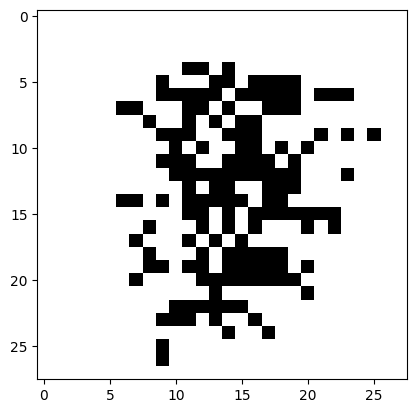

In [ ]:
import numpy as np

output_image = []
for i in range(28):
    row = []
    for j in range(28):
        probability_black = y[(i, j)] / batch_size
        random_value = np.random.rand()
        if random_value < probability_black:
            row.append(1)
        else:
            row.append(0)
    output_image.append(row)

##Here, create a new 2 by 2 array with all the probabilities

output_image = torch.tensor(output_image, dtype=torch.float32)

plot.imshow(output_image, cmap=plot.cm.binary)
plot.show()

100%|██████████| 1000/1000 [00:18<00:00, 53.64it/s]


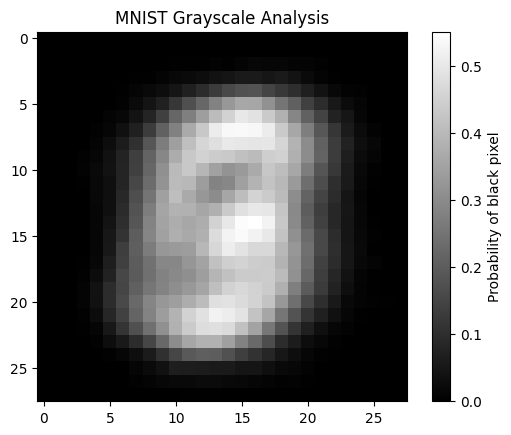

In [ ]:
import torchvision
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Set up the transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
batch_size = 60000
trainset = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# Get the first batch
for x in trainloader:
    break

# Initialize the pixel counter dictionary
pixel_counts = {}
for i in range(28):
    for j in range(28):
        pixel_counts[(i, j)] = 0

# Count black pixels
for image_index in tqdm(range(1000)): #50 should be batch_size
    for i in range(28):
        for j in range(28):
            if x[0][image_index][0][i][j] > 0:  # Changed condition to > 0
                pixel_counts[(i, j)] += 1

# Create the grayscale image
grayscale_image = np.zeros((28, 28))
for i in range(28):
    for j in range(28):
        grayscale_value = pixel_counts[(i, j)] / 1000 #should be batch_size
        grayscale_image[i, j] = grayscale_value

# Display the resulting image
plt.imshow(grayscale_image, cmap='gray')
plt.title("MNIST Grayscale Analysis")
plt.colorbar(label='Probability of black pixel')
plt.show()

##now make sure above aren't loading them in as black or white, load them in with their actual magnitude values

i am experimenting with the MNIST dataset. right now, it goes across all of mnist and makes an image at the end based on if the probability of each individual pixel is more than likely (50% or more) to be black. in that case, that output pixel for the image will be black and otherwise it will be white.

I want to change my code so that it uses grey scale. this means, if 25% of the images across the dataset have a particular pixel black, the model will make that pixel 25% grey (instead of white, previously). if 90% of the that pixel across the MNIST dataset are black, the model will make that pixel in the output 90% black. please change my code to do this:
import torchvision, torch
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

batch_size = 60000
trainset = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
for x in trainloader:
  break
import matplotlib.pyplot as plot
plot.imshow(x[0][0][0], cmap=plot.cm.binary)
plot.show()
y = {}
for i in range(28):
  for j in range(28):
    y[(i, j)] = 0
for image_index in tqdm.tqdm(range(batch_size)):
  for i in range(28):
    for j in range(28):
      if x[0][image_index][0][i][j] == -1:
        y[(i, j)] += 0
      else:
        y[(i, j)] += 1

(so far if prob > 0.5 make black, otherwise make 1
instead, if probability is 0.25 it should be grey 25% the way
if 80% chance black, make it like 80% black
plot this)

In [ ]:
#create new notebook -- everything i did so far is first model -- make second model in a new notebook